# 🕸️ 01_scraping_exploration.ipynb - Scraping Bible Verses

This notebook demonstrates how we explored and validated the structure of the scraped Bible data before cleaning and annotation.

📁 Source folders: `data/raw/bible_kjv/`, `data/raw/bible_rv60/`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Visualization settings
pd.set_option("display.max_colwidth", None)
sns.set(style="whitegrid")

In [4]:
# Load the scraped CSV relative to notebook location
csv_path = Path("../data/raw/bible_rv60/43_juan.csv").resolve()
if not csv_path.exists():
    raise FileNotFoundError(f"❌ File not found: {csv_path}. Please run the scraper first.")

In [5]:
# Read the file with robust handling
df = pd.read_csv(csv_path, encoding="utf-8")

In [6]:
# Quick overview
print("\n🔍 First rows:")
display(df.head())


🔍 First rows:


,book,chapter,verse,subtitle,text,source_url
0,juan,1,1,El Verbo hecho carne,"En el principio era el Verbo, y el Verbo era con Dios, y el Verbo era Dios.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=1&version=rv60
1,juan,1,2,El Verbo hecho carne,Este era en el principio con Dios.,https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=1&version=rv60
2,juan,1,3,El Verbo hecho carne,"Todas las cosas por él fueron hechas, y sin él nada de lo que ha sido hecho, fue hecho.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=1&version=rv60
3,juan,1,4,El Verbo hecho carne,"En él estaba la vida, y la vida era la luz de los hombres.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=1&version=rv60
4,juan,1,5,El Verbo hecho carne,"La luz en las tinieblas resplandece, y las tinieblas no prevalecieron contra ella.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=1&version=rv60


In [7]:
print("\n📊 Data info:")
df.info()


📊 Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book        879 non-null    object
 1   chapter     879 non-null    int64 
 2   verse       879 non-null    int64 
 3   subtitle    860 non-null    object
 4   text        879 non-null    object
 5   source_url  879 non-null    object
dtypes: int64(2), object(4)
memory usage: 41.3+ KB


In [8]:
# Check if there are Null

df.isnull().sum()


book           0
chapter        0
verse          0
subtitle      19
text           0
source_url     0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]


,book,chapter,verse,subtitle,text,source_url
682,juan,16,1,NaN,"Estas cosas os he hablado, para que no tengáis tropiezo.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=16&version=rv60
683,juan,16,2,NaN,"Os expulsarán de las sinagogas; y aun viene la hora cuando cualquiera que os mate, pensará que rinde servicio a Dios.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=16&version=rv60
684,juan,16,3,NaN,Y harán esto porque no conocen al Padre ni a mí.,https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=16&version=rv60
781,juan,19,1,NaN,"Así que, entonces tomó Pilato a Jesús, y le azotó.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=19&version=rv60
782,juan,19,2,NaN,"Y los soldados entretejieron una corona de espinas, y la pusieron sobre su cabeza, y le vistieron con un manto de púrpura;",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=19&version=rv60
783,juan,19,3,NaN,"y le decían: ¡Salve, Rey de los judíos! y le daban de bofetadas.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=19&version=rv60
784,juan,19,4,NaN,"Entonces Pilato salió otra vez, y les dijo: Mirad, os lo traigo fuera, para que entendáis que ningún delito hallo en él.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=19&version=rv60
785,juan,19,5,NaN,"Y salió Jesús, llevando la corona de espinas y el manto de púrpura. Y Pilato les dijo: ¡He aquí el hombre!",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=19&version=rv60
786,juan,19,6,NaN,"Cuando le vieron los principales sacerdotes y los alguaciles, dieron voces, diciendo: ¡Crucifícale! ¡Crucifícale! Pilato les dijo: Tomadle vosotros, y crucificadle; porque yo no hallo delito en él.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=19&version=rv60
787,juan,19,7,NaN,"Los judíos le respondieron: Nosotros tenemos una ley, y según nuestra ley debe morir, porque se hizo a sí mismo Hijo de Dios.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=19&version=rv60


In [10]:
print("\n🧾 Basic stats:")
display(df.describe(include="all"))



🧾 Basic stats:


,book,chapter,verse,subtitle,text,source_url
count,879,879.000000,879.000000,860,879,879
unique,1,NaN,NaN,82,879,21
top,juan,NaN,NaN,Jesús y la mujer samaritana,"Y hay también otras muchas cosas que hizo Jesús, las cuales si se escribieran una por una, pienso que ni aun en el mundo cabrían los libros que se habrían de escribir. Amén.",https://www.biblia.es/biblia-buscar-libros-1.php?libro=juan&capitulo=6&version=rv60
freq,879,NaN,NaN,42,1,71
mean,NaN,10.137656,23.265074,NaN,NaN,NaN
std,NaN,5.727918,15.043719,NaN,NaN,NaN
min,NaN,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,6.000000,11.000000,NaN,NaN,NaN
50%,NaN,10.000000,21.000000,NaN,NaN,NaN
75%,NaN,15.000000,33.000000,NaN,NaN,NaN


C:\Users\manue\AppData\Local\Temp\ipykernel_25724\45045592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\manue\AppData\Local\Temp\ipykernel_25724\45045592.py:8: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


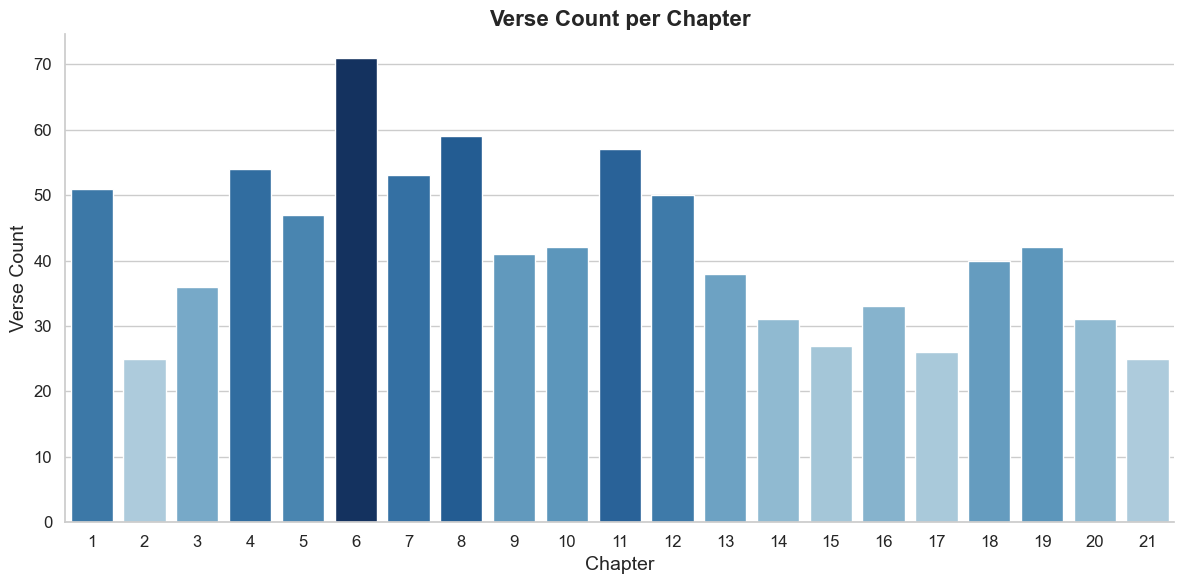

In [12]:
# Calculate verses per chapter
verses_per_chapter = df.groupby("chapter").size().reset_index(name="verse_count")

# Verses per chapter visualization
plt.figure(figsize=(12, 6))
normalized_colors = palette(verses_per_chapter["verse_count"] / verses_per_chapter["verse_count"].max())

sns.barplot(
    data=verses_per_chapter,
    x="chapter",
    y="verse_count",
    palette=normalized_colors
)
plt.title("Verse Count per Chapter", fontsize=16, fontweight="bold")
plt.xlabel("Chapter", fontsize=14)
plt.ylabel("Verse Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


In [13]:
# Unique subtitles
print("\n📚 Unique subtitles:")
display(df["subtitle"].value_counts())


📚 Unique subtitles:


subtitle
Jesús y la mujer samaritana                42
Jesús, el pan de vida                      35
Jesús ora por sus discípulos               26
Los fariseos interrogan al ciego sanado    22
Los judíos rechazan a Jesús                21
                                           ..
Ríos de agua viva                           3
Jesús anuncia la negación de Pedro          3
Pedro niega a Jesús                         3
Jesús ante el sumo sacerdote                3
El propósito del libro                      2
Name: count, Length: 82, dtype: int64

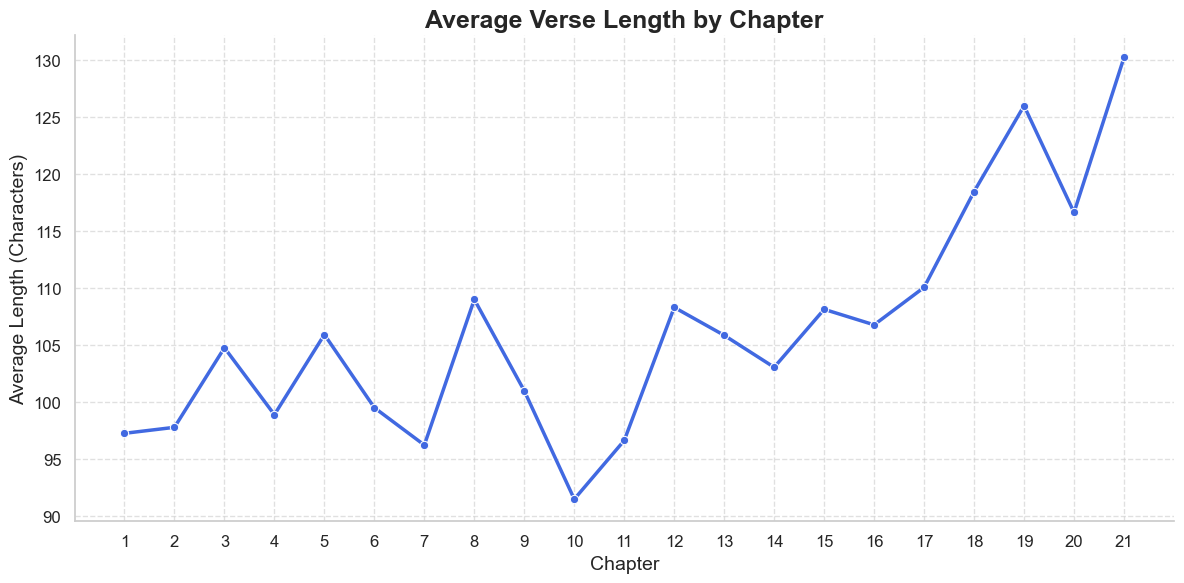

In [14]:
# Average verse length per chapter
df["verse_length"] = df["text"].str.len()
length_stats = df.groupby("chapter")["verse_length"].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=length_stats.index, 
    y=length_stats.values, 
    marker="o", 
    linewidth=2.5, 
    color="royalblue"
)
plt.title("Average Verse Length by Chapter", fontsize=18, fontweight="bold")
plt.xlabel("Chapter", fontsize=14)
plt.ylabel("Average Length (Characters)", fontsize=14)
plt.xticks(ticks=np.arange(1, 22, 1), fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [15]:
# One example verse per subtitle
sampled = df.groupby("subtitle").first().reset_index()[["chapter", "verse", "subtitle", "text"]]
print("\n📌 One verse per subtitle:")
display(sampled)


📌 One verse per subtitle:


,chapter,verse,subtitle,text
0,8,21,"A donde yo voy, vosotros no podéis venir","Otra vez les dijo Jesús: Yo me voy, y me buscaréis, pero en vuestro pecado moriréis; a donde yo voy, vosotros no podéis venir."
1,6,1,Alimentación de los cinco mil,"Después de esto, Jesús fue al otro lado del mar de Galilea, el de Tiberias."
2,18,19,Anás interroga a Jesús,Y el sumo sacerdote preguntó a Jesús acerca de sus discípulos y de su doctrina.
3,21,15,Apacienta mis ovejas,"Cuando hubieron comido, Jesús dijo a Simón Pedro: Simón, hijo de Jonás, ¿me amas más que éstos? Le respondió: Sí, Señor; tú sabes que te amo. El le dijo: Apacienta mis corderos."
4,18,1,Arresto de Jesús,"Habiendo dicho Jesús estas cosas, salió con sus discípulos al otro lado del torrente de Cedrón, donde había un huerto, en el cual entró con sus discípulos."
...,...,...,...,...
77,1,19,Testimonio de Juan el Bautista,"Este es el testimonio de Juan, cuando los judíos enviaron de Jerusalén sacerdotes y levitas para que le preguntasen: ¿Tú, quién eres?"
78,12,20,Unos griegos buscan a Jesús,Había ciertos griegos entre los que habían subido a adorar en la fiesta.
79,16,25,Yo he vencido al mundo,"Estas cosas os he hablado en alegorías; la hora viene cuando ya no os hablaré por alegorías, sino que claramente os anunciaré acerca del Padre."
80,7,45,¡Nunca ha hablado hombre así!,Los alguaciles vinieron a los principales sacerdotes y a los fariseos; y éstos les dijeron: ¿Por qué no le habéis traído?
